Note: you may need to restart the kernel to use updated packages.
Pour la variable agglo :
Agglomeration         62.259639
Hors agglomeration    37.740361
Name: agglo, dtype: float64


Pour la variable sexe :
Homme    67.969649
Femme    32.030351
Name: sexe, dtype: float64


Pour la variable catr :
Voie Communale                 41.478602
Route départementale           35.390331
Autoroute                      11.968235
Route nationale                 7.215534
Routes de métropole urbaine     2.202637
Autre                           0.923468
Parc de stationnement           0.699369
Hors réseau public              0.121826
Name: catr, dtype: float64


Pour la variable catu :
Conducteur    73.212661
Passager      18.315949
Pieton         8.471390
Name: catu, dtype: float64


Pour la variable grav2 :
Blesse     58.403333
Indemne    41.596667
Name: grav2, dtype: float64


Pour la variable grav4 :
Indemne               41.596667
Blesse leger          40.087384
Blesse hospitalise    15.685419


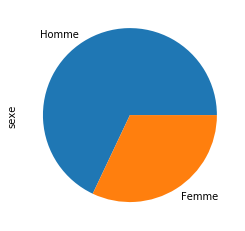

Pour la variable agglo :


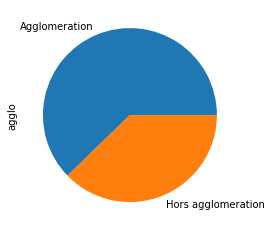

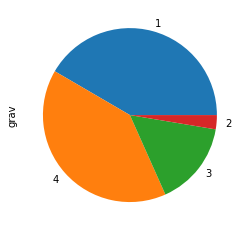

NameError: name 'df_usager' is not defined

In [22]:
%run "/Users/cloclo/Desktop/Python/Accidents-corporels/Ouverture_donnees.ipynb"

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
pip install mca

  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=5996 sha256=cb5913d44ad7249d1b530e307343ad0a83130aa85ad26870385ed44ffe1a6a22
  Stored in directory: /Users/cloclo/Library/Caches/pip/wheels/00/46/2a/acfca530ddd1e1d72271e07cb7517611d10cd6bcd05cd0cf34
Successfully built mca
Note: you may need to restart the kernel to use updated packages.


Création d'indicatrices

In [14]:
df2 = pd.get_dummies(df, columns=['grav2', 'sexe', 'catu', 'agglo'], drop_first=True)
df2 = df2[["grav2_Indemne", 'sexe_Homme', 'catu_Passager', 'catu_Pieton', 'agglo_Hors agglomeration']]

In [16]:
y = df2["grav2_Indemne"]
x = df2[["sexe_Homme", "catu_Passager", 'catu_Pieton', 'agglo_Hors agglomeration']]
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

/Users/cloclo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/cloclo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/cloclo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             Results: Logit
Model:                  Logit                Pseudo R-squared:     inf   
Dependent Variable:     grav2_Indemne        AIC:                  inf   
Date:                   2021-11-30 14:30     BIC:                  inf   
No. Observations:       132977               Log-Likelihood:       -inf  
Df Model:               3                    LL-Null:              0.0000
Df Residuals:           132973               LLR p-value:          1.0000
Converged:              1.0000               Scale:                1.0000
No. Iterations:         7.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
sexe_Homme                0.0920   0.0081  11.3126 0.0000  0.0760  0.1079
catu_Passager            -0.3967   0.0144 -27.6184 0.0000 -0.4249 -0

/Users/cloclo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [24]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

,sexe,catu
0,Femme,Passager
1,Femme,Conducteur
2,Homme,Conducteur
3,Femme,Conducteur
4,Homme,Conducteur
...,...,...
132972,Femme,Conducteur
132973,Homme,Conducteur
132974,Homme,Conducteur
132975,Homme,Conducteur


In [18]:
from sklearn.tree import DecisionTreeClassifier
arbreFirst = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10)

In [39]:
df["sexe"]=pd.Categorical(df["sexe"], ordered=False)
df["catu"]=pd.Categorical(df["catu"], ordered=False)
df["agglo"]=pd.Categorical(df["agglo"], ordered=False)
df["grav2"]=pd.Categorical(df["grav2"], ordered=False)
#arbreFirst.fit(X = df[["sexe", "catu", 'agglo']], y = df["grav2"])

In [41]:
import mca
mca_df2=mca(df2)
# Valeurs singulières
print(mca_df2.L)
# Composantes principales des colonnes (modalités) print(mca_df.fs_c())
# Premier plan principal
#col=[1,1,2,2,2,3,3,5,5,5,6,6,6,7,7,7]
#plt.scatter(mca_df2.fs_c()[:, 0],
 #  mca_df2.fs_c()[:, 1],c=col)

TypeError: 'module' object is not callable